In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap 
import json 
import xgboost
import seaborn as sns
import math

In [2]:
def df_gen(RESULTS_DIR, NSHARDS = 10):  
  dfs = []
  for shard_idx in range(NSHARDS):
    filename = 'results.ndjson-%s-of-%s' % (str(shard_idx).zfill(5), str(NSHARDS).zfill(5))
    print(filename)

    with open(f'{RESULTS_DIR}/{filename}', 'r') as f:
      lines = f.readlines()
      records = map(json.loads, lines)
      dfs.append(pd.DataFrame.from_records(records))

  # Construct df and remove nans
  results_df = pd.concat(dfs)
  results_df.drop(['marginal_param', 'fixed_params'], axis=1, inplace=True)
  # results_df.dropna(axis=0, inplace=True)
  del dfs
  return results_df

In [3]:
NSHARDS = 10
models = ['MLP', 'GCN']
RESULTS_DIR = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm'
RESULTS_DIR1 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/1'
RESULTS_DIR2 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/2'
RESULTS_DIR3 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/3'
RESULTS_DIR4 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/4'
RESULTS_DIR5 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/5'

df = df_gen(RESULTS_DIR, NSHARDS)
df1 = df_gen(RESULTS_DIR1, NSHARDS)
df2 = df_gen(RESULTS_DIR2, NSHARDS)
df3 = df_gen(RESULTS_DIR3, NSHARDS)
df4 = df_gen(RESULTS_DIR4, NSHARDS)
df5 = df_gen(RESULTS_DIR5, NSHARDS)


df = pd.concat([df, df1, df2, df3, df4, df5], axis = 0)
df = df.reset_index(drop=True)
df

results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.ndjson-00003-of-00010
results.ndjson-00004-of-00010
results.ndjson-00005-of-00010
results.ndjson-00006-of-00010
results.ndjson-00007-of-00010
results.ndjson-00008-of-00010
results.ndjson-00009-of-00010
results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.ndjson-00003-of-00010
results.ndjson-00004-of-00010
results.ndjson-00005-of-00010
results.ndjson-00006-of-00010
results.ndjson-00007-of-00010
results.ndjson-00008-of-00010
results.ndjson-00009-of-00010
results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.ndjson-00003-of-00010
results.ndjson-00004-of-00010
results.ndjson-00005-of-00010
results.ndjson-00006-of-00010
results.ndjson-00007-of-00010
results.ndjson-00008-of-00010
results.ndjson-00009-of-00010
results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.nd

,nvertex,avg_degree,feature_center_distance,feature_dim,edge_center_distance,edge_feature_dim,p_to_q_ratio,num_clusters,cluster_size_slope,power_exponent,...,MLP__test_logloss,MLP__model_dropout,MLP__model_hidden_channels,MLP__model_in_channels,MLP__model_lr,MLP__model_num_layers,MLP__model_weight_decay,MLP__model_out_channels,MLP__train_epochs,MLP__train_patience
0,1352,9.562289,0.390386,16,1.0,1,13.464975,7,0.588315,0.607698,...,1.915104,0.6,16,32,0.0010,1,0.0001,7,200,15
1,1359,13.115789,1.715084,16,1.0,1,14.082951,7,0.333200,1.771090,...,1.759299,0.4,32,32,0.0020,2,0.0005,7,200,15
2,3530,4.380339,0.683335,16,1.0,1,12.749049,8,0.792320,1.960316,...,2.054621,0.4,16,32,0.0020,1,0.0001,8,200,15
3,3551,18.522669,0.491903,16,1.0,1,4.927547,7,0.447886,2.618927,...,1.900633,0.6,32,32,0.0005,1,0.0000,7,200,15
4,2919,16.854589,0.967202,16,1.0,1,14.667087,7,0.185181,2.227018,...,1.795015,0.4,16,32,0.0010,1,0.0010,7,200,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3609,8.031199,0.284539,16,1.0,1,6.456280,2,0.305609,0.407720,...,0.690681,0.4,16,32,0.0020,2,0.0000,2,200,15
4996,1056,13.282520,0.176616,16,1.0,1,2.358084,7,0.430003,0.751247,...,1.932516,0.2,8,32,0.0005,3,0.0005,7,200,15
4997,3578,7.994299,1.955615,16,1.0,1,9.699010,8,0.229193,0.995935,...,2.082255,0.6,16,32,0.0020,3,0.0001,8,200,15
4998,1191,13.736746,0.603972,16,1.0,1,14.052332,9,0.507515,0.841346,...,2.150609,0.6,32,32,0.0020,2,0.0005,9,200,15


In [45]:
perf_meas = "test_rocauc_ovr"
df['perf_delta'] = df[f'GCN__{perf_meas}']-df[f'MLP__{perf_meas}']

graph_metrics_refined = ['nvertex', 'avg_degree', 'degree_gini', 'p_to_q_ratio',
                 'num_clusters', 'community_size_simpsons', 'feature_center_distance',
                 'avg_cc']

graph_metrics_computable = ['nvertex', 'avg_degree', 'degree_gini', 'edge_homogeneity',
                 'num_clusters', 'community_size_simpsons', 'feature_angular_snr',
                 'avg_cc']

graph_metrics = ['nvertex', 'avg_degree', 'feature_center_distance',
       'p_to_q_ratio','num_clusters', 'cluster_size_slope', 'power_exponent', 'min_deg',
       'num_nodes', 'num_edges', 'edge_density',
       'degree_gini', 'coreness_eq_1',
       'coreness_geq_2', 'coreness_geq_5', 'coreness_geq_10', 'coreness_gini',
       'avg_cc', 'transitivity', 'num_triangles', 'cc_size',
       'power_law_estimate', 'edge_homogeneity',
       'avg_in_feature_angular_distance', 'avg_out_feature_angular_distance',
       'feature_angular_snr', 'pareto_exponent', 'avg_degree_est',
       'community_size_simpsons', 'p_to_q_ratio_est', 'p_to_q_ratio__est_dc']

Using XGBoost version: 3.0.2

Training XGBoost model...
Model training complete.

--- Model Evaluation ---
Root Mean Squared Error (RMSE): 0.1149
R-squared (R²): 0.5289
------------------------

Interpretation:
RMSE: On average, the model's prediction for 'Perf_Delta' is off by ~0.11 performance points.
R²: The model explains ~52.9% of the variance in the GCN-MLP performance gap.

--- Feature Importance ---
                   Feature  Importance
3         edge_homogeneity    0.350962
1               avg_degree    0.126349
2              degree_gini    0.111780
7                   avg_cc    0.106779
6      feature_angular_snr    0.087299
5  community_size_simpsons    0.084662
4             num_clusters    0.083042
0                  nvertex    0.049127
--------------------------


/var/folders/xx/jrs09g7x5nb0vzsph61j259c0000gn/T/ipykernel_40015/355579726.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


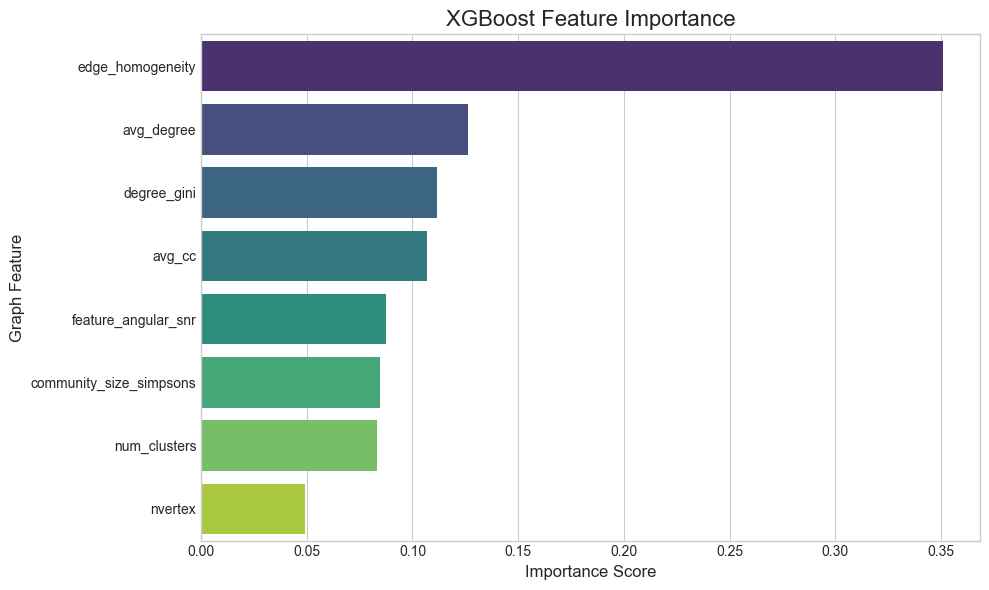

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

print(f"Using XGBoost version: {xgb.__version__}")


# Create or load the data
data = df
predictor_features = graph_metrics_computable

X = data[predictor_features]

if 'perf_data' in data.columns:
    y = data['perf_delta'] 
else:
    data['perf_delta'] = data['GCN__test_rocauc_ovr']-data['MLP__test_rocauc_ovr']
    y = data['perf_delta']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgbr = xgb.XGBRegressor(
    objective='reg:squarederror', # Objective function for regression
    n_estimators=1000,            # Number of trees to build.
    max_depth=5,                  # Maximum depth of a tree. Deeper trees can model more complex relationships but can also overfit.
    learning_rate=0.05,           # Step size shrinkage to prevent overfitting.
    subsample=0.8,                # Fraction of samples to be used for fitting each tree.
    colsample_bytree=0.8,         # Fraction of features to be used for fitting each tree.
    random_state=42,              # Seed for reproducibility
    n_jobs=-1                     # Use all available CPU cores
)

print("\nTraining XGBoost model...")

xgbr.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False # Set to True if you want to see training progress
)

print("Model training complete.")


# --- Step 4: Evaluate the Model on the Test Set ---

# Make predictions on the unseen test data
y_pred = xgbr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print("------------------------")
print("\nInterpretation:")
print(f"RMSE: On average, the model's prediction for 'Perf_Delta' is off by ~{rmse:.2f} performance points.")
print(f"R²: The model explains ~{r2*100:.1f}% of the variance in the GCN-MLP performance gap.")


# --- Step 5: Analyze Feature Importance ---

# This is the key part for answering your research question.
# Which features did the model find most predictive?

# Get feature importance from the trained model
importances = xgbr.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importance ---")
print(importance_df)
print("--------------------------")

# Plotting the feature importances
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('XGBoost Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Graph Feature', fontsize=12)
plt.tight_layout()
plt.show()

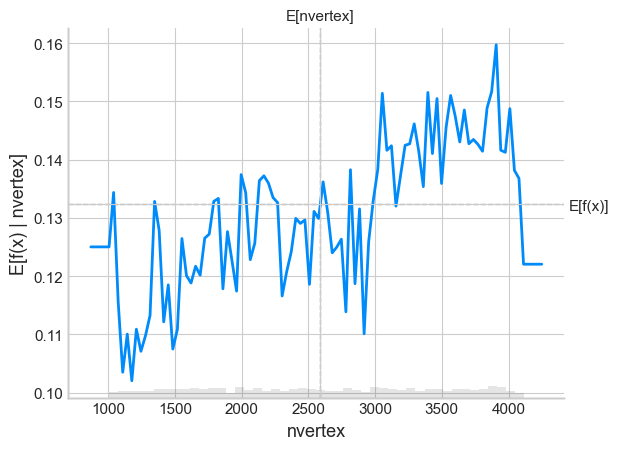

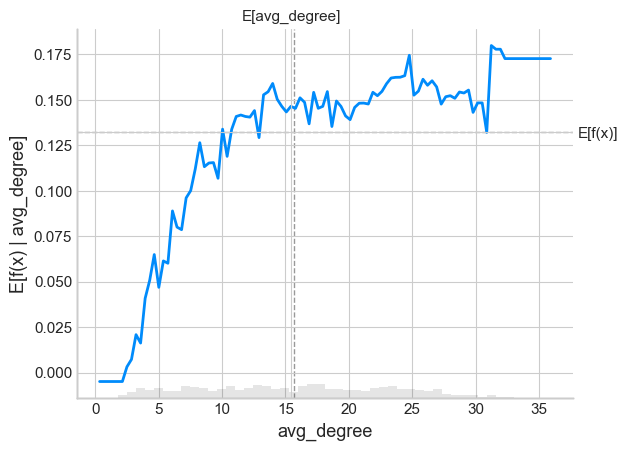

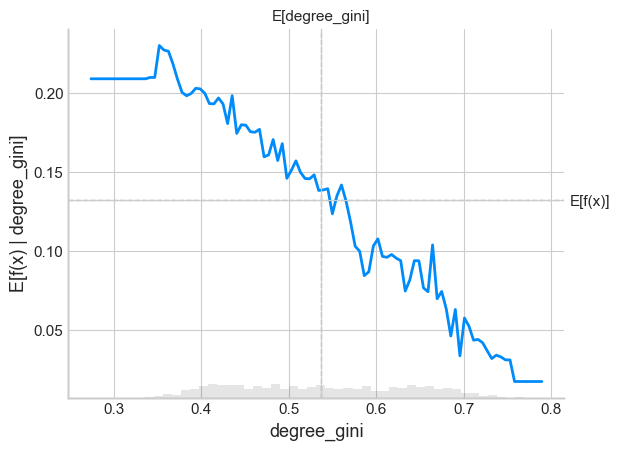

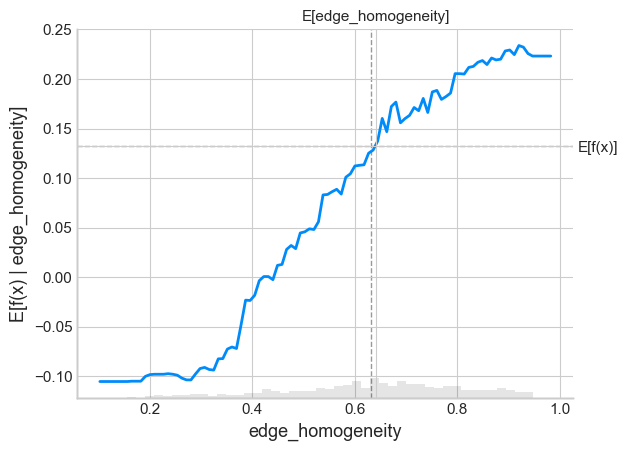

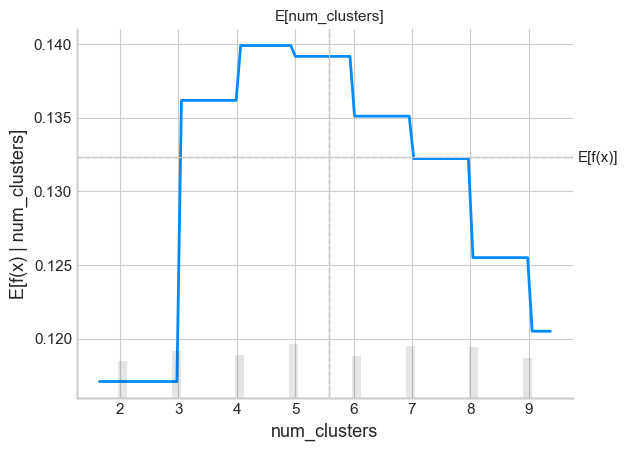

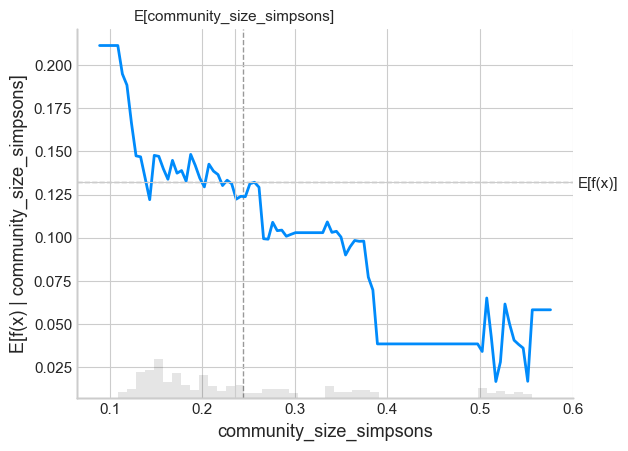

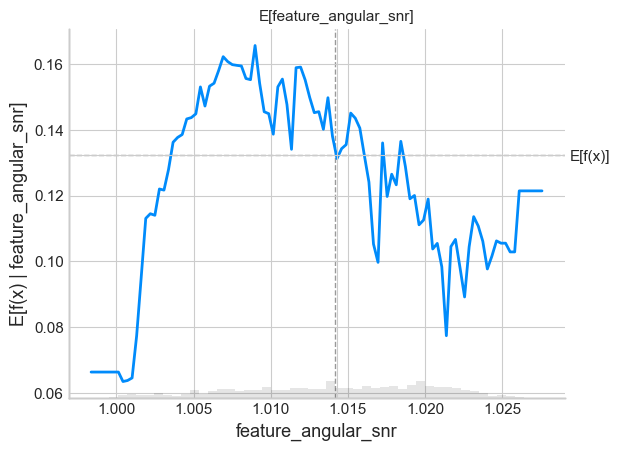

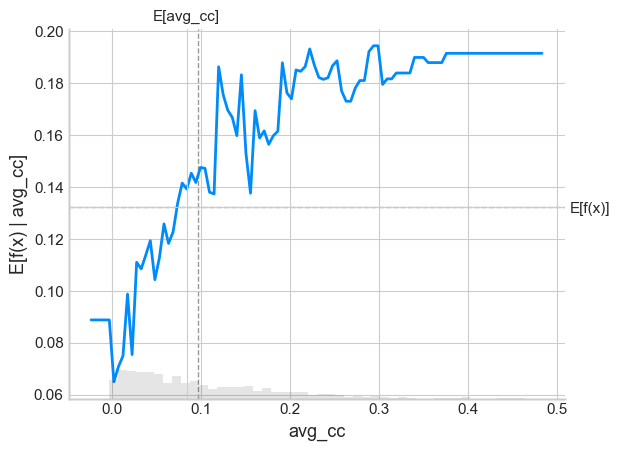

In [48]:
for m in graph_metrics_computable:
    fig, ax = shap.partial_dependence_plot(
        m,
        xgbr.predict,
        X_test,
        model_expected_value=True,
        feature_expected_value=True,
        show=False,
        ice=False,
    )


Calculating SHAP values...
SHAP values calculated.

Generating grid of SHAP dependence plots...


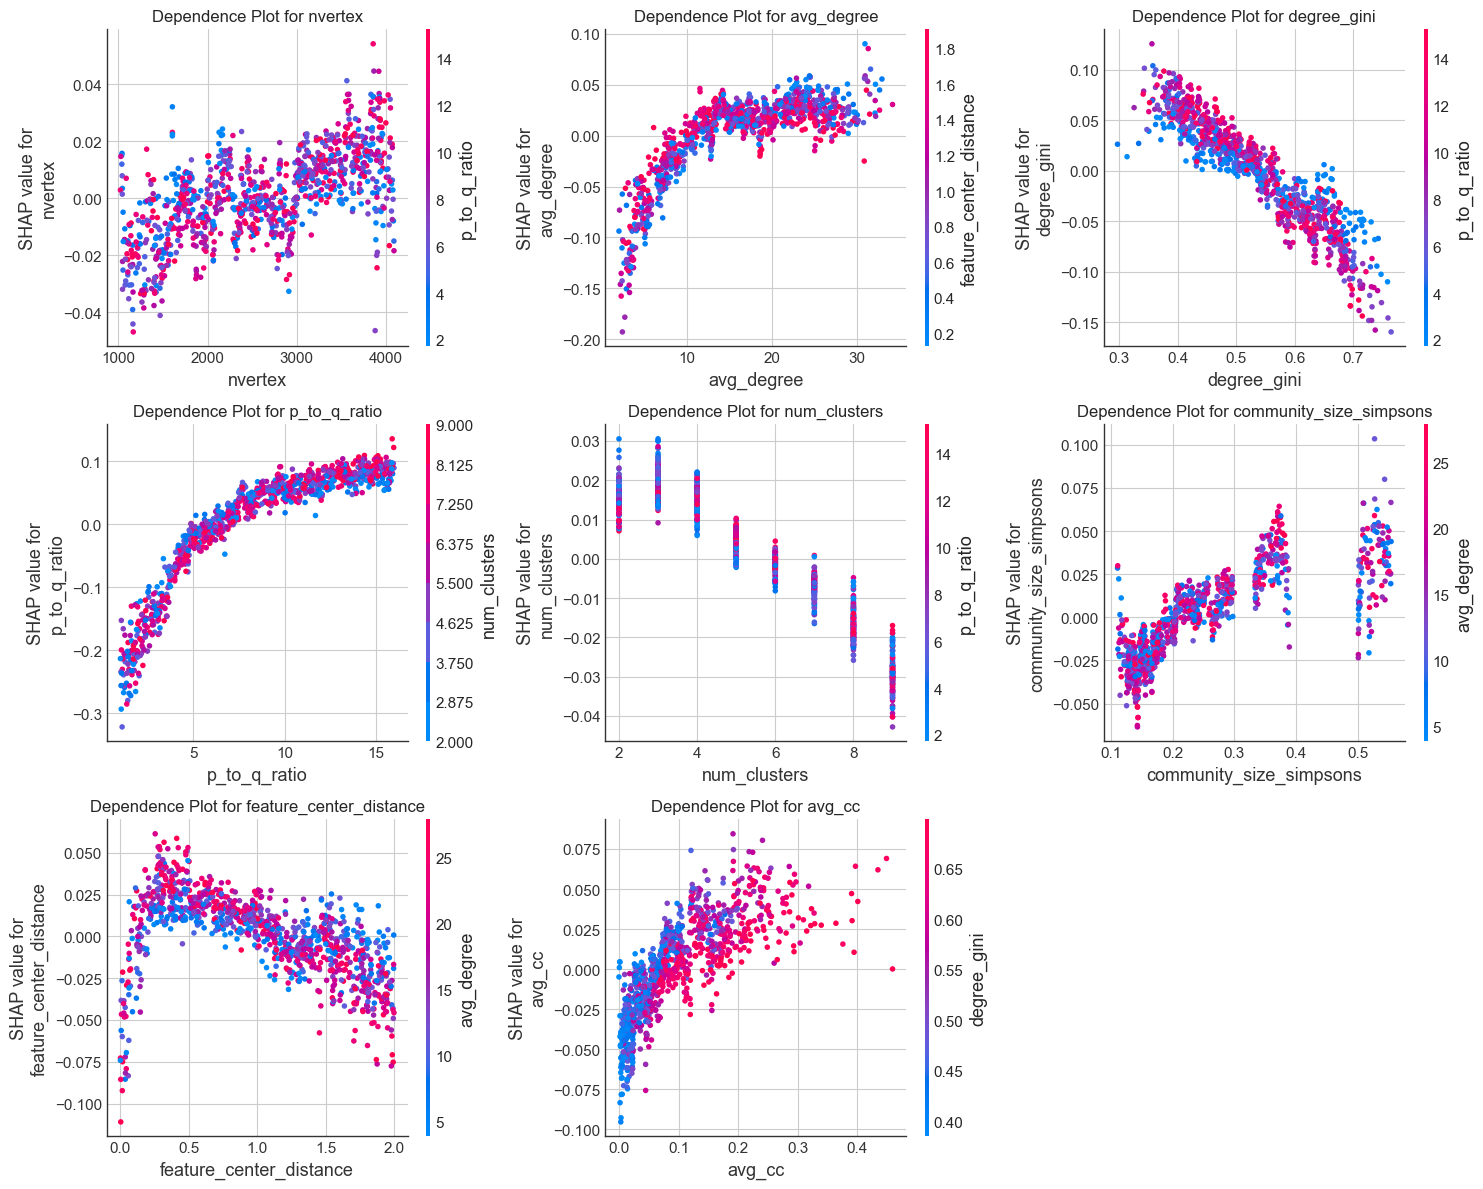

In [41]:

# --- Step 1: Create the SHAP Explainer and Calculate Values ---
print("\nCalculating SHAP values...")
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_test)
print("SHAP values calculated.")

# --- Step 2: Generate a Grid of Dependence Plots ---
print("\nGenerating grid of SHAP dependence plots...")

# Get the list of feature names
features = X_test.columns
n_features = len(features)

# Set up the subplot grid
# Let's aim for 3 columns
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    # Create the dependence plot on the specified subplot axis
    # We set interaction_index=None to get a "pure" dependence plot without auto-coloring
    shap.dependence_plot(
        feature,
        shap_values,
        X_test,
        ax=ax,
        show=False,
        # interaction_index="feature_center_distance"
    )
    ax.set_title(f'Dependence Plot for {feature}', fontsize=12)
    ax.grid(True)

# Hide any unused subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
# Save the comprehensive figure for your thesis
plt.savefig('shap_dependence_grid.png', dpi=300, bbox_inches='tight')
plt.show()

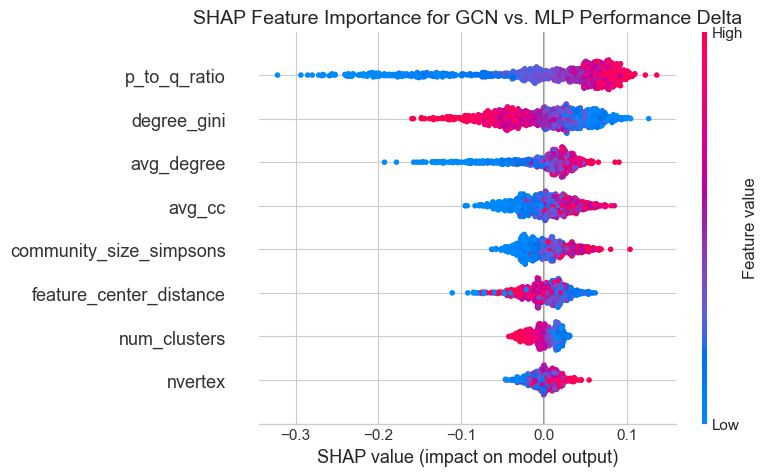

In [42]:
# This is the primary visualization for SHAP feature importance.
shap.summary_plot(
    shap_values,
    X_test,
    show=False
)
plt.title('SHAP Feature Importance for GCN vs. MLP Performance Delta', fontsize=14)
# Save the figure for your thesis
# plt.savefig('shap_beeswarm_importance.png', dpi=300, bbox_inches='tight')
plt.show()


Generating SHAP Feature Importance Plot (Bar Chart)...


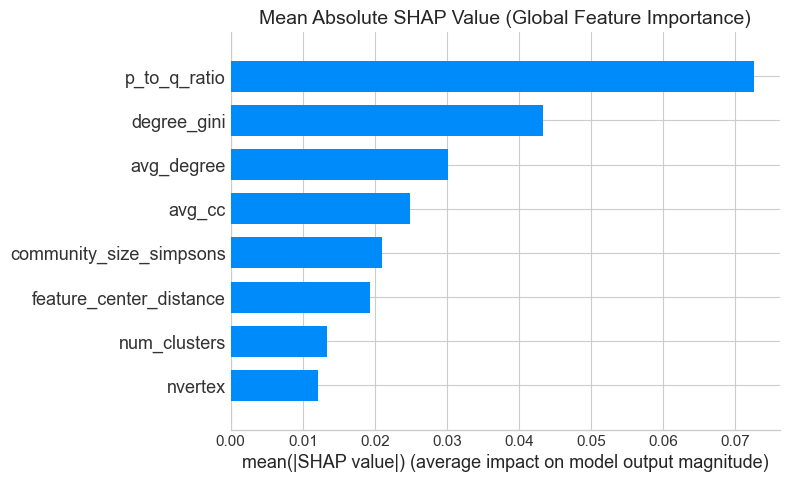

In [43]:
# --- Step 3 (Optional): Generate a Simple Bar Chart ---
print("\nGenerating SHAP Feature Importance Plot (Bar Chart)...")
# This plot is equivalent to the one from model.feature_importances_
# but is derived from the more consistent SHAP values.
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="bar",
    show=False
)
plt.title('Mean Absolute SHAP Value (Global Feature Importance)', fontsize=14)
# plt.savefig('shap_bar_importance.png', dpi=300, bbox_inches='tight')
plt.show()